Streaming output truncated to the last 5000 lines.
Episode 45001: 0.8697362280838203
Episode 45002: 0.8697391227056576
Episode 45003: 0.8697420171988534
Episode 45004: 0.8697449115634166
Episode 45005: 0.8697478057993556
Episode 45006: 0.8697506999066791
Episode 45007: 0.8697535938853956
Episode 45008: 0.8697342694632065
Episode 45009: 0.8697371636783754
Episode 45010: 0.8697400577649411
Episode 45011: 0.8697429517229122
Episode 45012: 0.8697458455522972
Episode 45013: 0.8697487392531047
Episode 45014: 0.8697516328253432
Episode 45015: 0.8697545262690214
Episode 45016: 0.8697574195841479
Episode 45017: 0.8697603127707311
Episode 45018: 0.8697632058287796
Episode 45019: 0.869766098758302
Episode 45020: 0.869768991559307
Episode 45021: 0.869771884231803
Episode 45022: 0.8697747767757985
Episode 45023: 0.8697776691913022
Episode 45024: 0.8697583511016347
Episode 45025: 0.8697390338700722
Episode 45026: 0.8697419268866877
Episode 45027: 0.8697448197748018
Episode 45028: 0.8697477125344231


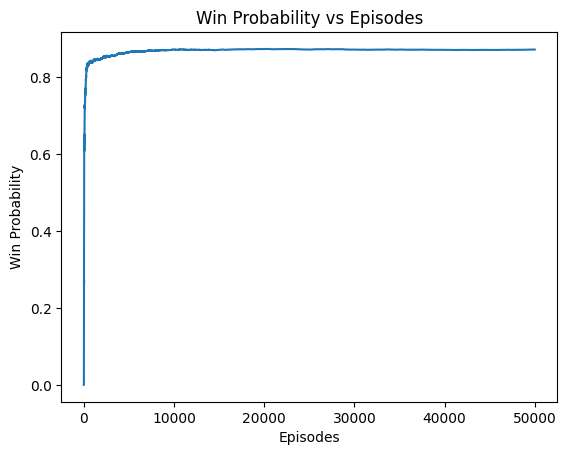

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Define the snake and ladder game environment
class SnakeLadderGame:
    def __init__(self, size=100):
        self.size = size
        self.board = np.zeros((size,))
        self.snakes_and_ladders = {
            1: 38, 4: 14, 9: 31, 21: 42, 28: 84, 36: 44,
            51: 67, 71: 91, 80: 100, 16: 6, 47: 26, 49: 11,
            56: 53, 62: 19, 64: 60, 87: 24, 93: 73, 95: 75, 98: 78
        }
        for key, value in self.snakes_and_ladders.items():
            self.board[key-1] = value - key

    def move(self, position, steps):
        new_position = position + steps
        if new_position >= self.size:
            return self.size - 1
        return new_position + int(self.board[new_position])

# Q-Network
class QNetwork:
    def __init__(self, state_size, action_size, learning_rate=0.1, discount_factor=0.99):
        self.state_size = state_size
        self.action_size = action_size
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.Q = np.zeros((state_size, action_size))

    def update(self, state, action, reward, next_state):
        best_next_action = np.argmax(self.Q[next_state])
        td_target = reward + self.discount_factor * self.Q[next_state][best_next_action]
        td_error = td_target - self.Q[state][action]
        self.Q[state][action] += self.learning_rate * td_error

    def choose_action(self, state, epsilon):
        if np.random.random() < epsilon:
            return np.random.choice(self.action_size)
        else:
            return np.argmax(self.Q[state])

# Train Q-Network
def train_q_network(env, q_network, episodes=1000, max_steps=100, epsilon=0.1):
    win_count = 0
    win_probabilities = []
    for episode in range(episodes):
        state = 0
        for step in range(max_steps):
            action = q_network.choose_action(state, epsilon)
            next_state = env.move(state, action + 1)
            if next_state == env.size - 1:
                q_network.update(state, action, 100, next_state)
                win_count += 1
                break
            elif next_state < state:
                q_network.update(state, action, -100, next_state)
                break
            else:
                q_network.update(state, action, 0, next_state)
                state = next_state
        win_probabilities.append(win_count / (episode + 1))
    return win_probabilities

# Main function
if __name__ == "__main__":
    env = SnakeLadderGame()
    q_network = QNetwork(env.size, 6)
    episodes = 50000
    win_probabilities = train_q_network(env, q_network, episodes)

    print("Win probability for each episode:")
    for episode, win_prob in enumerate(win_probabilities):
        print(f"Episode {episode + 1}: {win_prob}")

    plt.plot(range(1, episodes + 1), win_probabilities)
    plt.xlabel('Episodes')
    plt.ylabel('Win Probability')
    plt.title('Win Probability vs Episodes')
    plt.show()
